## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style('whitegrid')
sns.set_context("talk")
plt.style.use('seaborn-deep')
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean().round(4)

0.1197

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
not_match = (df.query('landing_page == "old_page" & group == "treatment"').user_id.count(),
             df.query('landing_page == "new_page" & group == "control"').user_id.count())
not_match

(1965, 1928)

In [7]:
total_not_match = sum(not_match)
total_not_match

3893

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [10]:
df.notnull().sum()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df.query('landing_page == "new_page" & group == "treatment" | landing_page == "old_page" & group == "control"')

In [12]:
# Double Check all of the correct rows were removed - this should be 0
(df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0],
 df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0])

(0, 0)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2.query('user_id.duplicated() == True')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2 = df2.drop(index = 1899)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.converted.mean().round(4)

0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
p_control_df2 = df2[df2['group'] == 'control'].converted.mean()
p_control_df2

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
p_experiment_df2 = df2[df2['group'] == 'treatment'].converted.mean()
p_experiment_df2

0.11880806551510564

In [22]:
p_diff_df2 = (p_experiment_df2 - p_control_df2).round(4)
p_diff_df2

-0.0016

d. What is the probability that an individual received the new page?

In [23]:
df2[df2['landing_page'] == 'new_page'].user_id.count(), df2[df2['landing_page'] == 'old_page'].user_id.count()

(145310, 145274)

In [24]:
(df2[df2['landing_page'] == 'new_page'].user_id.count()/df2.shape[0]).round(4)

0.5001

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The difference between the converted rates for new and old pages is very small. Just a 0.16%. According the data observed there is no significative evidence that justify the cost of changing the page.**

<a id='ab_test'></a>
### Part II - A/B Test


Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**One alternative is to evaluate the difference between the converted rates: *p<sub>new</sub> - p<sub>old</sub>.***

**If it is negative or equal to 0 it means that the old page would be a better option. This will be the null hypothesis (H<sub>0</sub>). Otherwise, we should choose the new page, this would be the alternative hypothesis (H<sub>1</sub>)**

$$H_0: p_{new} - p_{old} \leq 0$$


$$H_1: p_{new} - p_{old} > 0$$


**To decide wether the time of observation is enough or not it can be helpful to check how many days the test has been running and if there has been an evolution along these days.**

In [25]:

df2['timestamp'] = pd.to_datetime(df2['timestamp'])
#df2['timestamp'] = df2['timestamp'].datetime.datetime.fromtimestamp(1572183573).isoformat()
df2.timestamp.min(), df2.timestamp.max()

(Timestamp('2017-01-02 13:42:05.378582'),
 Timestamp('2017-01-24 13:41:54.460509'))

**The data has been stored for 23 days.**

In [26]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**We are going to prepare the data to do a visualization of the evolution of the conversions.**

In [27]:
#new datafame for control group.
df2_time_control = df2.query('group == "control"')
#group the rows by days and drop de column user_id.
df2_time_control = df2_time_control.set_index('timestamp')
df2_time_control = df2_time_control.resample('D').mean()
df2_time_control = df2_time_control.drop(columns = 'user_id')
#new datafame for experiment group.
df2_time_treament = df2.query('group == "treatment"')
#group the rows by days and drop de column user_id.
df2_time_treament = df2_time_treament.set_index('timestamp')
df2_time_treament = df2_time_treament.resample('D').mean()
df2_time_treament = df2_time_treament.drop(columns = 'user_id')
#join the two datafrmes.
df2_time_control.rename(columns={'converted': 'converted_control'}, inplace=True)
df2_time_treament.rename(columns={'converted': 'converted_treatment'}, inplace=True)
df2_time = df2_time_control.join(df2_time_treament, how='inner')
#calculate the difference of the mean of conversions by day.
df2_time['Conversion Rate Difference'] = df2_time.converted_treatment - df2_time.converted_control
df2_time = df2_time.reset_index()
#create a column Days to do the visualization.
df2_time['Days'] = df2_time.index

df2_time.head()

,timestamp,converted_control,converted_treatment,Conversion Rate Difference,Days
0,2017-01-02,0.125568,0.119874,-0.005695,0
1,2017-01-03,0.113809,0.113781,-0.000028,1
2,2017-01-04,0.121922,0.116649,-0.005273,2
3,2017-01-05,0.123230,0.114988,-0.008242,3
4,2017-01-06,0.115350,0.123462,0.008113,4


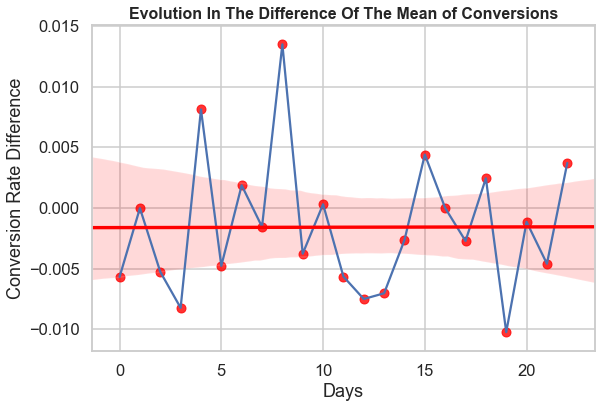

In [28]:
#it makes a plot with the results. There is a line chart and a scatter plot with the trend line. 
plt.figure(figsize=(9,6))
plt.title('Evolution In The Difference Of The Mean of Conversions', 
          fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.plot(df2_time['Days'],df2_time['Conversion Rate Difference'])
sns.regplot(data=df2_time, x='Days', y='Conversion Rate Difference', fit_reg=True, color='red');

**We have drawn a plot with the difference between the mean of conversions in the treatment group and the control group. We also have drawn a trend line to observe the evolution, but we don't see any clear trend. Instead of that, the results seem to follow an horizontal line.**

**Maybe we can leave the test more time anyway to see if the people change their behavior, but so far the results are quite stable. These sesults tend also to be negative, which means that there is a bigger rate of conversión in the control group.**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [29]:
p_new_null = df2.converted.mean().round(4)
p_new_null

0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [30]:
p_old_null = df2.converted.mean().round(4)
p_old_null

0.1196

c. What is $n_{new}$?

In [31]:
df2_treatment = df2.query('group == "treatment"')
n_new = df2_treatment.shape[0]
n_new

145310

d. What is $n_{old}$?

In [32]:
df2_control = df2.query('group == "control"')
n_old = df2_control.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [33]:
new_page_converted = np.random.binomial(1,p_new_null,n_new)
new_page_converted

array([0, 0, 0, ..., 1, 0, 1])

In [34]:
new_page_converted.mean().round(4)

0.1197

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [35]:
old_page_converted = np.random.binomial(1,p_old_null,n_old)
old_page_converted

array([0, 0, 0, ..., 0, 1, 0])

In [36]:
old_page_converted.mean().round(4)

0.1193

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [37]:
sim_diff = (new_page_converted.mean() - old_page_converted.mean())
sim_diff

0.00036270219122583325

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [38]:
#initiate p_diffs
p_diffs = []
for _ in range(10000):
    #it simulates a binomial dataset. It's like to threw a coin n_old times with a probability of head = p_old_null.
    control_df = np.random.binomial(1,p_old_null,n_old)
    #it simulates a binomial dataset. It's Like to threw a coin n_new times with a probability of head = p_new_null.
    treatment_df = np.random.binomial(1,p_new_null,n_new)
    #calculates the mean for each array
    p_control = control_df.mean()
    p_treatment = treatment_df.mean()
    #calculates the difference between the two groups
    diff = p_treatment - p_control
    p_diffs.append(diff)

In [39]:
p_diffs = np.array(p_diffs)

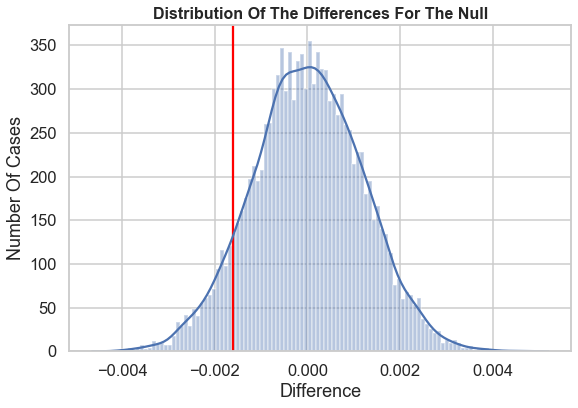

In [40]:
#plots an histogram with 100 bins. I also drawed the kde to observe the shape better.
plt.figure(figsize=(9,6))
plt.axvline(p_diff_df2, c='red')
plt.ylabel('Number Of Cases')
plt.xlabel('Difference')
plt.title('Distribution Of The Differences For The Null', 
          fontdict = {'fontsize': 16, 'fontweight': 'bold'})
sns.distplot(p_diffs,kde=True, bins= 100);

In [41]:
#proportion of p_diffs bigger than the difference observed.
(p_diffs > p_diff_df2).mean()

0.9108

**We can do the same without a loop. Using only the binomial function. The result is very similar.**

In [42]:
#it simulates a binomial datasets. It's like to threw n_old coins 10000 times with a probability of head = p_old_null.
#then we divide by n_old to calculate the mean.
control_df = np.random.binomial(n_old,p_old_null,10000) / n_old
#it simulates a binomial datasets. It's like  to threw n_new coins 10000 times with a probability of head = p_new_null.
#the we divide by n_old to calculate the mean.
treatment_df = np.random.binomial(n_new,p_new_null,10000) / n_new
#we obtain the difference.
p_diffs1 = treatment_df - control_df

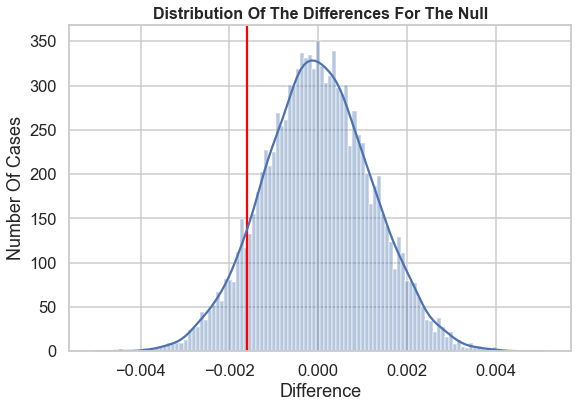

In [43]:
#plots an histogram with 100 bins. I also drawed the kde to observe the shape better.
plt.figure(figsize=(9,6))
plt.axvline(p_diff_df2, c='red')
plt.ylabel('Number Of Cases')
plt.xlabel('Difference')
plt.title('Distribution Of The Differences For The Null', 
          fontdict = {'fontsize': 16, 'fontweight': 'bold'})
sns.distplot(p_diffs1,kde=True, bins= 100);

In [44]:
#proportion of p_diffs1 bigger than the difference observed.
(p_diffs1 > p_diff_df2).mean()

0.9053

**Or we can use the function cohice to do the same.**

In [45]:
#initiate p_diffs
p_diffs2 = []
for _ in range(10000):
    #we simulate a random dataset using the random choice with p_old_null probablility for 1 and 1-p_old_null for 0.
    control_df = np.random.choice([0,1],n_old, p=(1-p_old_null,p_old_null))
    #we simulate a random dataset using the random choice with p_new_null probablility for 1 and 1-p_new_null for 0.
    treatment_df = np.random.choice([0,1],n_new, p=(1-p_new_null,p_new_null))
    #It calculates the means.
    p_control = control_df.mean()
    p_treatment = treatment_df.mean()
    #It calculates the difference.
    diff = p_treatment - p_control
    p_diffs2.append(diff)

In [46]:
p_diffs2 = np.array(p_diffs2)

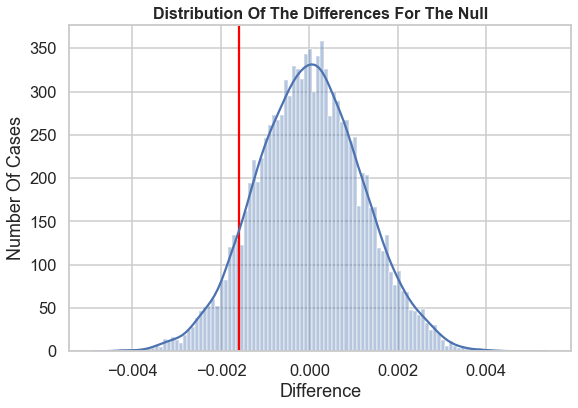

In [47]:
#plots an histogram with 100 bins. I also drawed the kde to observe the shape better.
plt.figure(figsize=(9,6))
plt.axvline(p_diff_df2, c='red')
plt.ylabel('Number Of Cases')
plt.xlabel('Difference')
plt.title('Distribution Of The Differences For The Null', 
          fontdict = {'fontsize': 16, 'fontweight': 'bold'})
sns.distplot(p_diffs2,kde=True, bins= 100);

In [48]:
#proportion of p_diffs2 bigger than the difference observed.
(p_diffs2 > p_diff_df2).mean()

0.9112

In [49]:
p_diffs2.mean()

4.894824129671151e-06

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

**The histogram shape is as we expected. We have drawn 10000 simulated datasets for each group. We have suposed that
each dataset follows a binomial distribution, which can be aproximated by a normal distribution according the high number of samples for each dataset. The mean used to compute the binomial is the same for all datasets and it is equal to the mean observed in the original dataframe regardless the page.**

**In each one of the 10000 tests we have calculated the difference in the mean for both simulated dataset, treatment and control.**

**Then we have drawn all the differences in an histogram. The result is a bell or gaussian shape distribution centered in 0. We have also draw a red line with the position of the difference of the means observed in the original dataset to have a graphic view of the proportions that are bigger and smaller than this value.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

**This proportion is about 0.907 (90.7%)**

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We have calculated the p-value for the hypothesis test H<sub>0</sub> explained in the point one. We have simulated an scenario repeteadly for 10000 times in which the H<sub>0</sub> hypothesis is true. Expeciphically we have situated our simulated tests in the limit between H<sub>0</sub> and H<sub>1</sub>, where the difference is equal to 0. Then we have calculated the proportion of results from this tests that are closer to the H<sub>1</sub> than the actual result extracted from the original data set. In our case it means than the proportion of results that are greater than the real difference of the means is 90.07%.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [50]:
#immport the statsmodels library
import statsmodels.api as sm

#number of conversions for the control and treatment groups.
convert_old = df2_control.converted.sum()
convert_new = df2_treatment.converted.sum()
#total number of individuals in each group.
n_old = df2_control.shape[0]
n_new = df2_treatment.shape[0]
convert_old, convert_new, n_old, n_new


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [51]:
#counts:array with the number of conversions for the treatment and control groups
counts = np.array([convert_new, convert_old])
#nobs:array with the number of rows for the treatment and control groups
nobs = np.array([n_new, n_old])
#call proportions_ztest with the option larger.
stat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='larger')
#results z-score and p-value.
stat, pval

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**In this case we have analyzed the same problem as before but from another point of view. Instead of drawing an estimation of the distribution for the difference of the means according the null hypothesis, we estimate the z-score distribution for the difference of the means of the two groups.**

**We have supposed that the data set is normally distibuted and the samples are independent in both methods. The distribution of the z-score will be also normally distributed.**

**Then, the function proportions_ztest calulates the the two samples z-score for the two groups. This value is saved in the <span style="color:red">stat</span> variable in our code.**

**The z-score measures how far the difference is from the null hypothesis. It measures how far, in Standar Errors, our difference is from the expected hypothesis null (null limit: the difference is equal to zero).**

$$ z= {\text{Observed difference - Expected difference} \over \text{SE for difference}}$$

$$ z= {{(\bar{X_1}-\bar{X_2})-(\mu_1-\mu_2)} \over {\sqrt{\sigma_\bar{X_1}^2+\sigma_\bar{X_2}^2}}}$$

$$\text{Where: }(\mu_1-\mu_2) = 0 \text{  , because we are suposing the null hypothesis.}$$

$$z={{(\bar{X_1}-\bar{X_2})} \over {\sqrt{{\sigma_1^2}/n_1+{\sigma_2^2}/n_2}}}$$

**This formulas have been extracted from:<link>http://www.stat.ucla.edu/~cochran/stat10/winter/lectures/lect21.html</link>**

**Finally the value saved in <span style="color:red">pval</span> tell us the proportion of z-scores greater than the value saved in stat in the z-score distribution. In this case is greater because we have selected *altenative="larger"* and we have done that because we have decided that our hypthesis are:**

$$H_0: \mu_{new} - \mu_{old} \leq 0$$


$$H_1: \mu_{new} - \mu_{old} > 0$$

**This method is quicker because we only have to calculate the z-score. Then, as the z-score distribution is a gaussian function, the calculation of the proportion of values greater than z-score is very quick and easy with a computer.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Taking into account that the response variable is categorical, it should be performed a logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [52]:
#We create the intercetp column.
df2['intercept'] = 1
#We create dummy columns for the variable "group".
df2[['neg_ab_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop(columns = 'neg_ab_page')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [53]:
#It instantiates the model: response variable:"converted"; predictors:"intercept", "ab_page"
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
#Fit the model.
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:               8.077e-06
Time:                        10:51:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [55]:
#coefficients beta0 and beta1.
results.params.values

array([-1.98877705, -0.01498911])

In [56]:
#result for the z-score of beta1
results.tvalues[1]

-1.3109158028253873

**The probability of converted = True if ab_page = new_page if we don't take into account other predicor variables. It is the same value that we had obtained from the original dataframe df2.**

In [57]:
#it calculates the probability of converted = True for the new page.
exp_logit = np.exp(results.params.values[0] + results.params.values[1])
p_converted = exp_logit / (1 + exp_logit)
p_converted

0.11880806551510481

In [58]:
p_experiment_df2 - p_converted

8.326672684688674e-16

**The probability of converted = True if ab_page = old_page if we don't take into account other predicor variables.It is also the same value that we had obtained from the original dataframe df2.**

In [59]:
#it calculates the probability of converted = True for the old page.
exp_logit = np.exp(results.params.values[0])
p_converted = exp_logit / (1 + exp_logit)
p_converted

0.1203863045004608

In [60]:
p_control_df2 - p_converted

4.0245584642661925e-16

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

In [61]:
#change the p-value obtained in logistic regression from two-sided case to larger case.
1-results.pvalues[1]/2

0.905056894381869

**In this case the p-value measures the statistical significance of the coefficient asociated with the ab_page column. It gives us an idea of how relevant is the statistical significance for the relationship between the variable response and the page of the group. In this case the null and alternative hypothesis are different from the hypothesis in Part II:**

$$H_0: \beta_1 = 0$$


$$H_1: \beta_1 \neq 0$$

**The p-value is differente here because, according the hypothesis, we are considering a two sided case. If we had excuted the function proportions_ztest with alternative='two_sided', the results would had been the same. Also, in the cell above, we have done the calcs to adapt the result to a "larger" case and we have obtained the same value as in the Part II.**

**We can also see that the z-value for the coeficient of ab_page is the same as we had calculted with the function proportions_ztest (-1.31). This is because the z-score is the point of intersection between the two hypothesis, and in both cases the intersection is the same, so it is logical that we have the same value.**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**As we have seen in the summary, the p-value is equal to 0.19. This means that is too large (more than 0.05) and we must fail to reject the null hypothisis. So we must consider so far, H<sub>0</sub> as true because we don't have statitical evidence that the probability of convesion depends on the page.**

**It is a good idea to consider other variables for searching for a better fit of the model. We could find new variables or combinations of variables that could explain better the variable response. Maybe if we divide the groups of test in amaller groups or market divisions, some of these groups could prefer the new page to the old one.**

**One of the most important problems that we can find is the collinearity between the predictor variables. In this case the confidence interval for the p-value of the coefficients can be very large and makes the method not useful. Because of this we always have to leave one of the dummy variables out for each predictor. To avoid the collinearity between the dummies of the same original predictor.**

**Another problem is that the results are a little more dificoult to interpretate.** 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [62]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [63]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [64]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


**It is not likely but, we are going to calculate the VIF's only to check that there is not collinearity between the predictor columns.**

In [65]:
#import the necessary libraries
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#It generates the matrices for the response and for the predictors
y, X = dmatrices('converted ~ ab_page + UK + US', df_new, return_type = 'dataframe')
#It calutalte the values
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,21.055923,Intercept
1,1.000006,ab_page
2,4.502236,UK
3,4.502223,US


**We have a high value, but only in the intercept. And those values can be normal when we work with dummy variables.**

In [66]:
#It calutaltes again the values changing the meaning of the intercept.
y, X = dmatrices('converted ~ ab_page + CA + US', df_new, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,5.002944,Intercept
1,1.000006,ab_page
2,1.140206,CA
3,1.140205,US


**In this case the VIF factors are even smaller.**

**First we are going to explore the relationship between the countries and the converted value**

In [67]:
#It instantiates the model: response variable:'converted'; predictors:'intercept', 'UK' , 'US'
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK' , 'US']])


In [68]:
### Fit Your Linear Model And Obtain the Results
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:               1.521e-05
Time:                        10:51:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [69]:
#we calculate the exponentials of the coefficients.
np.exp(results.params.values)

array([0.13035004, 1.05202749, 1.04164685])

**The exponentials of the coefficients for UK and US are a bit bigger than one, so the probability for converted will be bigger than in Canada, without taking into account the page. Anyway, the p-value for these coefficients (0.074 and 0.129) are out of range to give them statistical significance.**

**Now we are going to include the countries and the page in the model.**

In [70]:
#It instantiates the model: response variable:'converted'; predictors:'intercept', 'ab_page', 'UK' , 'US'
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK' , 'US']])

In [71]:
### Fit Your Linear Model And Obtain the Results
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:               2.323e-05
Time:                        10:51:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

**All the p-values are too large, so that the coefficients are not very accurate. Only the UK has a p-value close to 0.05.**

In [72]:
#we calculate the exponentials of the coeficients.
np.exp(results.params.values)

array([0.13133178, 0.98516771, 1.05194441, 1.04159895])

**The p-values continues to be bigger than 0.05 in all the cases. Which means that there is not enough statistical significance for the coeffiecients obtained. Anyway we can try to extract some conclusions.** 

**The first exponential (the exponential of the intercept) gives us the value of the logit of odds for the probability of conversion when the country is equal to Canada and the the page is the old page. The value obtained is close to the probabilities obtained so far.**

**The exponential of the ab_page coefficient indicates us that the logit for the new page is 0.98 smaller, regardless the other predictors.**
**The third and fourth exponentials tell us that the logit for UK and US are 1.05 and 1.04 greater, regardless the other predictors.**

**It is not easy to extract some new conclusions from hear. Only that Canada has a rate of conversion smaller than the other countries, for the old page and the new page, and that the new page has also a smaller rate than the old page without taking into account the countries.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [73]:
#We add some new columns to explore if there is some interaction between the page and the countries.
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CA_ab_page,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [74]:
#It instantiates the model: response variable:'converted'; 
#predictors:'intercept', 'ab_page' , 'UK', 'US', 'UK_ab_page', 'US_ab_page'
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page' , 'UK', 'US', 'UK_ab_page', 'US_ab_page']])

In [75]:
### Fit the Linear Model And Obtain the Results
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:               3.482e-05
Time:                        10:51:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**All the p-values are too large, so that the coefficients are not very accurate. Also the Pseudo R-square is almost 0, this can be usual. This model is not good to make predictions. But we can try to extract some conclusions anyway**

In [76]:
#we calculate the exponentials of the coeficients.
exp_values = np.exp(results.params.values)
exp_values

array([0.13479426, 0.9347762 , 1.01185353, 1.01768233, 1.08142797,
       1.04800102])

In [77]:
#odds for Canada and old_page.
exp_values[0]

0.13479426139051143

**These are the values by which we have to multiply to obtain the odds for the three countries in the old page.**

In [78]:
#value we have to multiply to obtain the odds for Canada, UK and US with old page
(1 , exp_values[2], exp_values[3]) 

(1, 1.0118535284746648, 1.0176823338671963)

**These are the odds for the three countries in the old page.**

In [79]:
#odds for Canada, UK and US with old page
ca, uk, us = (1 * exp_values[0] , exp_values[2] * exp_values[0], exp_values[3] * exp_values[0]) 
ca, uk, us

(0.13479426139051143, 0.13639204900612525, 0.13717773852380058)

**These are the probabilities of conversion for the three countries in the old page.**

In [80]:
#probability of conversion for Canada, UK and US with old page.
p_ca_old, p_uk_old, p_us_old = (ca/(1+ca), uk/(1+uk), us/(1+us))
p_ca_old, p_uk_old, p_us_old 

(0.1187829952764674, 0.12002200220021964, 0.12062998938220026)

**These are the values by which we have to multiply to obtain the odds for the three countries in the new page.**

In [81]:
#value we have to multiply to obtain the odds for Canada, UK and US with new page
(exp_values[1], exp_values[1] * exp_values[2] * exp_values[4], exp_values[1] * exp_values[3] * exp_values[5])

(0.9347762012475136, 1.0228757790497867, 0.9969688500843619)

**These are the odds for the three countries in the new page.**

In [82]:
#odds for Canada, UK and US with new page
ca, uk, us = (exp_values[1] * exp_values[0], exp_values[1] * exp_values[2] * exp_values[4] * exp_values[0], exp_values[1] * exp_values[3] * exp_values[5] * exp_values[0])
ca, uk, us

(0.12600246761258665, 0.13787778513125995, 0.13438567977646906)

**These are the probabilities of conversion for the three countries in the new page.**

In [83]:
#probability of conversion for Canada, UK and US with old page.
p_ca_new, p_uk_new, p_us_new = (ca/(1+ca), uk/(1+uk), us/(1+us))
p_ca_old, p_uk_old, p_us_old 

(0.1187829952764674, 0.12002200220021964, 0.12062998938220026)

**These are the increments or drecrements in the proportion of conversions between the new page and the old page in the three countries.**

In [84]:
#difference in the probability of conversion for Canada, UK, and US
(p_ca_new - p_ca_old, p_uk_new - p_uk_old, p_us_new - p_us_old)

(-0.00688051616401561, 0.0011489943100558841, -0.0021643897433280684)

**Again, the p-values are too large to stablish a clear linear relationship between the logit and the predictors. But we are going to analize the coefficients again to understand their meaning.**

**The exponential of the intercept has the same meaning as in the previous case. It is the value of the odds for Canada and old_page.**

**The exponential of the ab_page coefficient tells us that the logit is 0.93 smaller for new pages. So the odd for Canada and new_page is 0.93 samaller than for old_page, which means that there are less conversions in the new page in Canada.**

**The exponential for UK and US tell us that this countries has, for old pages, a slightly bigger rate of conversion than Canada in the old page: 1.012 and 1.0177 bigger.**

**Two know the behavior in the new page we have to consider in each case all the conditions that are true. For example, for US and new_page the last exponential tell us that we have to multiply by 1.048, but, because we are considering the new page we have to multiply also for 0.935. An for beeing US we have to multiply by 1.017.**

**We can see the results in the lines above but, as a summary we have seen that the only country that has a bigger rate of conversions in the new page than in the old page is the UK. This country is the only one who has a greater odd in the new page. Especifically it has a 0.001114 (0.1%) more conversions in the new page than in the old page. While Canada has 0.00688 (0.688%) less conversions and US 0.00216 (0.216%) less conversions.**


**Finally, We wold like to do also the hypothesis test separately for each country, because we have seen that UK have had a slightly different behavior than the other two countries. Maybe it could exsist the posibility of using different pages for each coutry. If we can reject the null hypothesis for UK, we could use the new page there and the old one in US and Canada.**

In [85]:
#Define new dataframes by country
df_new_ca = df_new.query('CA == 1')
df_new_uk = df_new.query('UK == 1')
df_new_us = df_new.query('US == 1')
#We check that both groups are equally distributed in all countries
df_new_ca.query('group == "control"').shape[0] / df_new_ca.shape[0], df_new_uk.query('group == "control"').shape[0] / df_new_uk.shape[0], df_new_us.query('group == "control"').shape[0] / df_new_us.shape[0]

(0.49644803089868267, 0.5017525460215826, 0.49954080906005827)

* **In this first case we apply the function proportions_ztest to the Canada dataframe.**

In [86]:
#Define new dataframes for control and treatment groups.
df_new_ca_control = df_new_ca.query('group == "control"')
df_new_ca_treatment = df_new_ca.query('group == "treatment"')
#The number of conversions for control.
convert_old = df_new_ca_control.converted.sum()
#The number of conversions for treatment.
convert_new = df_new_ca_treatment.converted.sum()
#The total number of rows.
n_old = df_new_ca_control.shape[0]
n_new = df_new_ca_treatment.shape[0]
#the size of the Canada dataframe and the fifference of the means.
df_new_ca.shape[0], convert_new/n_new-convert_old/n_old


(14499, -0.006880516164015332)

In [87]:
#It executes the function stats.proportions_ztest
counts = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])
stat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='larger')
stat, pval

(-1.2968998972345893, 0.9026671840573587)

**First, we can see that the difference observed is negative (-0.0069), this means that there had been less convesions in the new page than in the old page. And it is coherent with what we have seen before.**

**After applying the hypothesis test with the function proportions_ztest we have obtained a p-value equal to 0.90. It is similar to global p-values obtained and too big to reject the null hypothesis.**

* **We repeat the procedure with UK.**

In [88]:
#Define new dataframes for control and treatment groups.
df_new_uk_control = df_new_uk.query('group == "control"')
df_new_uk_treatment = df_new_uk.query('group == "treatment"')
#The number of conversions for control.
convert_old = df_new_uk_control.converted.sum()
#The number of conversions for treatment.
convert_new = df_new_uk_treatment.converted.sum()
#The total number of rows.
n_old = df_new_uk_control.shape[0]
n_new = df_new_uk_treatment.shape[0]
#the size of the UK dataframe and the fifference of the means.
df_new_uk.shape[0], convert_new/n_new-convert_old/n_old

(72466, 0.0011489943100552735)

In [89]:
#It executes the function stats.proportions_ztest
counts = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])
stat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='larger')
stat, pval

(0.4748911128778919, 0.3174322930960848)

**For the UK we have observed that the difference of the means is positive. This indicates that there was a little more conversions rate in the new page, but only a 0.1% more.**

**In this case we have obtained a considerable smaller p-value: 0.317. This means that we are closer to reject the null hypothesis and accept that the new page is better, but, even in this case, the p-value is not smaller than the threshold 0.05. Anyway it is a big difference with Canada.** 

* **We do the same in the case of US dataframe.**

In [90]:
#Define new dataframes for control and treatment groups.
df_new_us_control = df_new_us.query('group == "control"')
df_new_us_treatment = df_new_us.query('group == "treatment"')
#The number of conversions for control.
convert_old = df_new_us_control.converted.sum()
#The number of conversions for treatment.
convert_new = df_new_us_treatment.converted.sum()
#The total number of rows.
n_old = df_new_us_control.shape[0]
n_new = df_new_us_treatment.shape[0]
#the size of the US dataframe and the fifference of the means.
df_new_us.shape[0], convert_new/n_new-convert_old/n_old

(203619, -0.002164389743329165)

In [91]:
#It executes the function stats.proportions_ztest
counts = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])
stat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='larger')
stat, pval

(-1.5051934564639167, 0.9338628264991603)

**In the case of the US we have observed a negative difference in the rate of conversion, as in Canada, but a little bit smaller.**

**Regarding the p-value, we have observed that it is even worst than in Canada, although the previous analysis might make us to think that the behavior of the US was better in the new page: we had observed that the difference in the odds was smaller in the US case than in Canada,  and here we observe a smaller difference in the rate of conversions also. But the US dataframe has a lot more rows than Candada, this makes the Standar Error to be smaller, and consequently a bigger z-score (in absolute value). It is because of this that the p-value is bigger and consequently we are further to reject the null hypothesis.** 

<a id='conclusions'></a>
## Conclusions

**1. The most important conclusion is that we failed to reject the null hypothesis in all the cases. We can not consider that the new page suppose an increment in the rate of conversions.**

**2. The p-values are always bigger than the threshold 0.05, which would give us a confidence interval of 95%. This makes that we can not reject the null hypothesis in the hypothesis test methods and that the logistic regression does not give us accurate predictions. This is normal because the percentage of conversions is very similar in all the countries and in both pages.**  

**3. Anyway, if we do not take into account the p-values obtained in the logistic regressions, we can extract the conclusion that the behavior has not been the same in all the coutries:**


* **Canada has had the lowest rates of conversions, both in the old page and in the new page. And the new page has suffered here the biggest decrement in the conversions, 0.688% less than in the old page.**

* **The US has suffered the second biggest decrement, 0.216% less conversions in the new page than in the old page. But it seems that the rates of conversions are bigger than in Canada in both pages.**

* **Finally The UK is the only country that has had an increment in the conversions, very small but an increment. The conversions in the new page have been 0.1% greater than in the old page. Anyway the increment is so small and the p-value that we have obtained in the last point for the hypothesis test, 0.93, recommends that we not reject the null hypothesis in this case either.**



### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.